<div align="right"><em>Машинне навчання. Лабораторний практикум</em></div>

# Лабораторна робота №8
## Реалізація алгоритмів онлайн-навчання. Бібліотека Vowpal Wabbit


---


## Завдання

Набір даних (archive.zip) містить тексти арабською мовою, а саме відгуки про фільми, книги, продукти і т.д., що поділяються на три класи: позитивні, негативні та змішані.

Будемо розв'язувати задачу бінарної класифікації з використанням бібліотеки [Vowpal Wabbit](https://github.com/VowpalWabbit/vowpal_wabbit).

**Необхідно:**
1. Завантажити дані;
2. Видалити з набору відгуки з міткою ('Mixed');
3. Розділити дані на навчальну і відкладену частини;
4. Конвертувати дані у формат VW; 
5. Навчити модель Vowpal Wabbit з логістичною функцією втрат на навчальних даних;
6. Оцінити якість роботи класифікатора на відкладених даних:
    - обчислити показник якості ROC AUC ($\ge 0.925$); 
    - відобразити ROC-криву.

## Виконання завдання

In [1]:
import pandas as pd
import re
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import zipfile
import matplotlib.pyplot as plt

In [2]:
# Завантажити дані

In [3]:
with zipfile.ZipFile("data/archive.zip", mode="r") as f:
    interviews_df = pd.read_csv(f.open('ar_reviews_100k.tsv'), sep='\t')
    f.close()

interviews_df,interviews_df.describe(),interviews_df['label'].value_counts()

(          label                                               text
 0      Positive  ممتاز نوعا ما . النظافة والموقع والتجهيز والشا...
 1      Positive  أحد أسباب نجاح الإمارات أن كل شخص في هذه الدول...
 2      Positive  هادفة .. وقوية. تنقلك من صخب شوارع القاهرة الى...
 3      Positive  خلصنا .. مبدئيا اللي مستني ابهار زي الفيل الاز...
 4      Positive  ياسات جلوريا جزء لا يتجزأ من دبي . فندق متكامل...
 ...         ...                                                ...
 99994  Negative  معرفش ليه كنت عاوزة أكملها وهي مش عاجباني من ا...
 99995  Negative  لا يستحق ان يكون في بوكنق لانه سيئ . لا شي. لا...
 99996  Negative  كتاب ضعيف جدا ولم استمتع به. فى كل قصه سرد لحا...
 99997  Negative  مملة جدا. محمد حسن علوان فنان بالكلمات، والوصف...
 99998  Negative  لن ارجع إليه مرة اخرى . قربه من البحر. المكان ...
 
 [99999 rows x 2 columns],
            label                                               text
 count      99999                                              99999
 unique         3

In [4]:
# Видалити з набору відгуки з міткою ('Mixed')

In [5]:
interviews_df = interviews_df[interviews_df.label != "Mixed"]

In [6]:
# Розділити дані на навчальну і відкладену частини

In [7]:
train_text, test_text, train_labels, test_labels = train_test_split(interviews_df['text'], [1 if label == 'Positive' else -1 for label in interviews_df['label']], random_state=7)

In [8]:
# Конвертувати дані у формат VW

In [9]:
with open('data/review_train.vw', 'w', encoding='utf-8') as train_data:
    for text, label in zip(train_text, train_labels):
        train_data.write(f"{label} |text " +' '.join(re.findall('\w{3,}', text.lower()))+"\n")
with open('data/review_test.vw', 'w', encoding='utf-8') as test_data:
    for text in test_text:
        test_data.write(f" |text " +' '.join(re.findall('\w{3,}', text.lower()))+"\n")

In [10]:
!vw --help

driver:

Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = 
num sources = 1



  --onethread           Disable parse thread
VW options:
  --ring_size arg (=256, ) size of example ring
  --strict_parse           throw on malformed examples
Update options:
  -l [ --learning_rate ] arg Set learning rate
  --power_t arg              t power value
  --decay_learning_rate arg  Set Decay factor for learning_rate between passes
  --initial_t arg            initial t value
  --feature_mask arg         Use existing regressor to determine which 
                             parameters may be updated.  If no 
                             initial_regressor given, also used for initial 
                             weights.
Weight options:
  -i [ --initial_regressor ] arg  Initial regressor(s)
  --initial_weight arg            Set all weights to an initial value of arg.
  --random_weights                make initial weights random
  --normal_weights                make initial weights normal
  --truncated_normal_weights      make initial weights truncated normal
  --sparse_we

In [11]:
# Навчити модель Vowpal Wabbit з логістичною функцією втрат на навчальних даних

In [12]:
!vw -d data/review_train.vw --loss_function=logistic -f data/review_model.vw

final_regressor = data/review_model.vw
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = data/review_train.vw
num sources = 1
Enabled reductions: gd, scorer
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
0.693147 0.693147            1            1.0  -1.0000   0.0000       51
0.721334 0.749521            2            2.0   1.0000  -0.1097       25
0.673786 0.626238            4            4.0  -1.0000  -0.2916      103
0.707729 0.741671            8            8.0   1.0000  -0.1018       52
0.700535 0.693340           16           16.0  -1.0000  -0.1053       61
0.711590 0.722646           32           32.0  -1.0000  -0.0100       20
0.679559 0.647528           64           64.0   1.0000   0.0186       12
0.675492 0.671426          128          128.0   1.0000   0.2720       34
0.652635 0.629778          256          256.0   1.0000   1.9

In [13]:
# Оцінити якість роботи класифікатора на відкладених даних:
# - обчислити показник якості ROC AUC ($\ge 0.925$);
# - відобразити ROC-криву.

In [14]:
!vw -i data/review_model.vw -t -d data/review_test.vw -p data/predict.txt

only testing
predictions = data/predict.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = data/review_test.vw
num sources = 1
Enabled reductions: gd, scorer
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
    n.a.     n.a.            1            1.0  unknown   0.2805        7
    n.a.     n.a.            2            2.0  unknown   2.2179       68
    n.a.     n.a.            4            4.0  unknown  -2.0930       31
    n.a.     n.a.            8            8.0  unknown  -1.2113        5
    n.a.     n.a.           16           16.0  unknown  -2.6864      229
    n.a.     n.a.           32           32.0  unknown   2.7430       91
    n.a.     n.a.           64           64.0  unknown  -2.5771       20
    n.a.     n.a.          128          128.0  unknown   0.8770       18
    n.a.     n.a.          256          256.0  unknown  

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font fam

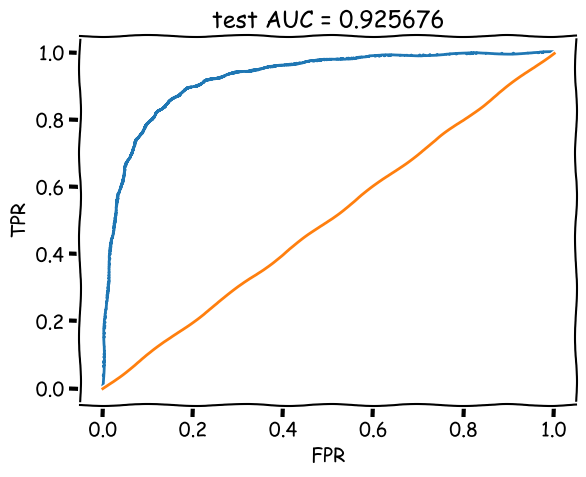

In [15]:
with open('data/predict.txt') as f:
    test_prediction = [float(i) for i in f.readlines()]

auc, curve = roc_auc_score(test_labels, test_prediction), roc_curve(test_labels, test_prediction)

with plt.xkcd():
    plt.plot(curve[0], curve[1]);
    plt.plot([0,1], [0,1])
    plt.xlabel('FPR'); plt.ylabel('TPR'); 
    plt.title('test AUC = %f' % (auc)); 
    plt.axis([-0.05,1.05,-0.05,1.05]);